# Principal Component Analysis

An R Tutorial courtesy of http://alexhwoods.com/pca/

In [51]:
library(MASS)
attitude <- attitude
suppressMessages(attach(attitude))
attitude

rating,complaints,privileges,learning,raises,critical,advance
-1.77722105,-1.17163233,-1.89068413,-1.47964962,-0.34945220,1.74163662,0.2008675
-0.13418156,-0.19527206,-0.17435704,-0.20164131,-0.15709319,-0.17854302,0.3952554
0.52303424,0.25535576,1.21505061,1.07636700,1.09324037,1.13526410,0.4924494
-0.29848551,-0.27037669,-0.66473621,-0.79804519,-1.02270873,0.93313993,-0.7710720
1.34455398,0.85619286,0.23429227,0.82076534,0.61234285,0.83207784,0.3952554
-1.77722105,-0.87121379,-0.33781676,-1.05364685,-1.02270873,-2.60403309,-0.8682660
-0.54494143,0.03004185,-0.90992579,-0.03124020,0.13144532,-0.68385345,-0.7710720
0.52303424,0.63087895,-0.25608690,-0.11644076,0.51616334,-0.88597762,-0.1879083
0.60518621,1.15661140,1.54197006,0.90596589,0.61234285,0.83207784,-1.1598478
0.19442634,-0.42058597,-0.66473621,-0.79804519,-0.25327270,0.52889158,-0.1879083


### Step 1: Normalize the Data

In [19]:
attitude$rating <- (rating - mean(rating)) / sd(rating)
attitude$complaints <- (complaints - mean(complaints)) / sd(complaints)
attitude$privileges <- (privileges - mean(privileges)) / sd(privileges)
attitude$learning <- (learning - mean(learning)) / sd(learning)
attitude$raises <- (raises - mean(raises)) / sd(raises)
attitude$critical <- (critical - mean(critical)) / sd(critical)
attitude$advance <- (advance - mean(advance)) / sd(advance)

suppressMessages(attach(attitude))
 
summary(attitude)
sd(privileges)

     rating          complaints        privileges         learning       
 Min.   :-2.0237   Min.   :-2.2231   Min.   :-1.8907   Min.   :-1.90565  
 1st Qu.:-0.4833   1st Qu.:-0.6083   1st Qu.:-0.6647   1st Qu.:-0.79805  
 Median : 0.0712   Median :-0.1202   Median :-0.1335   Median : 0.01136  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.5846   3rd Qu.: 0.7811   3rd Qu.: 0.7655   3rd Qu.: 0.88467  
 Max.   : 1.6732   Max.   : 1.7574   Max.   : 2.4410   Max.   : 1.58757  
     raises           critical          advance       
 Min.   :-2.0807   Min.   :-2.6040   Min.   :-1.7430  
 1st Qu.:-0.6139   1st Qu.:-0.5575   1st Qu.:-0.7711  
 Median :-0.1090   Median : 0.2762   Median :-0.1879  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6123   3rd Qu.: 0.5289   3rd Qu.: 0.4682  
 Max.   : 2.2474   Max.   : 1.7416   Max.   : 2.8251  

[1] 1

Alright, so all of our means are zero and all of our standard deviations are 1. Data normalized!

### Step 2: Compute Covariance Matrix

In [20]:
cov(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


### Step 3: Eigendecomposition of Covariance Matrix

Has to be diagonalizable. This means there exists some basis such that the matrix can be represented as a diagonal matrix (entries outside the main diagonal are all 0). 

In other terms, there exists some matrix $P$ such that $P^{-1}AP$ is a diagonal.

Also known as the **spectral decomposition** of a matrix.

In [35]:
x <- eigen(cov(attitude))
x$vectors

-0.4130048,0.39692583,-0.2634492,0.2341088,-0.143063817,0.41241010,0.597591161
-0.4405379,0.33362706,-0.2256118,0.0022033,0.278064283,0.22805897,-0.717205075
-0.3547748,0.09575954,0.1882432,-0.8906996,-0.005272287,-0.07598537,0.174304627
-0.4285613,0.04510225,0.3252857,0.2393794,-0.697628303,-0.35282836,-0.200036529
-0.4471312,-0.17917304,-0.0404021,0.2428067,0.556488662,-0.58548329,0.234335158
-0.1853508,-0.60263473,-0.7008081,-0.1493497,-0.292800611,0.01154899,-0.056334214
-0.3025594,-0.56979573,0.4956644,0.1152367,0.141732580,0.55201569,-0.004296286


An $n\times n$ matrix will have a set of $n$ linearly independent eigenvectors, represented by the columns of the eigendecomposition.

*Check: Matrix multiplication of covariance matrix by first first eigenvector should equal first eigenvalue times first eigenvector*

$
\begin{bmatrix}
    cov(x_{1},x_{1}) & cov(x_{1},x_{2}) & cov(x_{1},x_{3}) & \dots & cov(x_{1},x_{p}) \\
    cov(x_{2},x_{1}) & cov(x_{2},x_{2}) & cov(x_{2},x_{3}) & \dots & cov(x_{2},x_{p}) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    cov(x_{p},x_{1}) & cov(x_{p},x_{2}) & cov(x_{p},x_{3}) & \dots & cov(x_{p},x_{p}) \\
\end{bmatrix} \times
\begin{bmatrix}
    e_{11} \\
    e_{21} \\
    \vdots \\
    e_{p1} \\
\end{bmatrix} =
\lambda_{1}
\times
\begin{bmatrix}
    e_{11} \\
    e_{21} \\
    \vdots \\
    e_{p1} \\
\end{bmatrix}
$

In [39]:
cov(attitude) %*% x$vectors[, 1]
x$values[1] * x$vectors[, 1]

rating,-1.5348809
complaints,-1.6372045
privileges,-1.3184763
learning,-1.5926949
raises,-1.6617076
critical,-0.6888333
advance,-1.1244246


[1] -1.5348809 -1.6372045 -1.3184763 -1.5926949 -1.6617076 -0.6888333 -1.1244246

### Step 4: Projection of data onto principal components

In [49]:
A <- x$vectors[, 1:3]
B <- data.matrix(attitude)

newData <- t(A) %*% t(B)

In [48]:
newData <- t(newData)
newData <- data.frame(newData)
names(newData) <- c("feat1", "feat2", "feat3")
newData

,feat1,feat2,feat3,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
feat1,2.327700,0.2734616,-2.0691073,1.3378519,-1.91497405,2.891851,0.84931048,-0.3629092,-1.7718910,0.7548971,⋯,4.2011929,-0.06600967,0.8265851,2.8620330,1.32958805,-2.888499,-2.41622586,2.1389983,-3.2244967,-0.7027773
feat2,-2.445512,-0.2336707,-0.7029257,-0.2480772,0.04242223,1.171300,0.53309429,0.9368173,0.8643324,-0.3290739,⋯,0.1914424,-0.38340381,-0.3897015,-0.6275434,0.02409013,-1.656172,-0.04551734,-0.8913781,0.4865531,0.8835026
feat3,-1.211547,0.3083785,-0.2122343,-1.2399142,-0.64825456,1.694314,0.04708368,0.1406969,-1.0181801,-0.7946153,⋯,0.2058667,-0.22181661,-0.5820865,2.5161275,-0.65469549,1.398146,0.13549801,-0.7006946,0.5154271,-1.1973016


In [43]:
prcomp(attitude)
summary(prcomp(attitude))

Standard deviations (1, .., p=7):
[1] 1.9277904 1.0681395 0.9204301 0.7828599 0.5689225 0.4674726 0.3747503

Rotation (n x k) = (7 x 7):
                 PC1         PC2        PC3        PC4          PC5         PC6
rating     0.4130048 -0.39692583  0.2634492 -0.2341088  0.143063817  0.41241010
complaints 0.4405379 -0.33362706  0.2256118 -0.0022033 -0.278064283  0.22805897
privileges 0.3547748 -0.09575954 -0.1882432  0.8906996  0.005272287 -0.07598537
learning   0.4285613 -0.04510225 -0.3252857 -0.2393794  0.697628303 -0.35282836
raises     0.4471312  0.17917304  0.0404021 -0.2428067 -0.556488662 -0.58548329
critical   0.1853508  0.60263473  0.7008081  0.1493497  0.292800611  0.01154899
advance    0.3025594  0.56979573 -0.4956644 -0.1152367 -0.141732580  0.55201569
                    PC7
rating      0.597591161
complaints -0.717205075
privileges  0.174304627
learning   -0.200036529
raises      0.234335158
critical   -0.056334214
advance    -0.004296286

Importance of components%s:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9278 1.0681 0.9204 0.78286 0.56892 0.46747 0.37475
Proportion of Variance 0.5309 0.1630 0.1210 0.08755 0.04624 0.03122 0.02006
Cumulative Proportion  0.5309 0.6939 0.8149 0.90248 0.94872 0.97994 1.00000

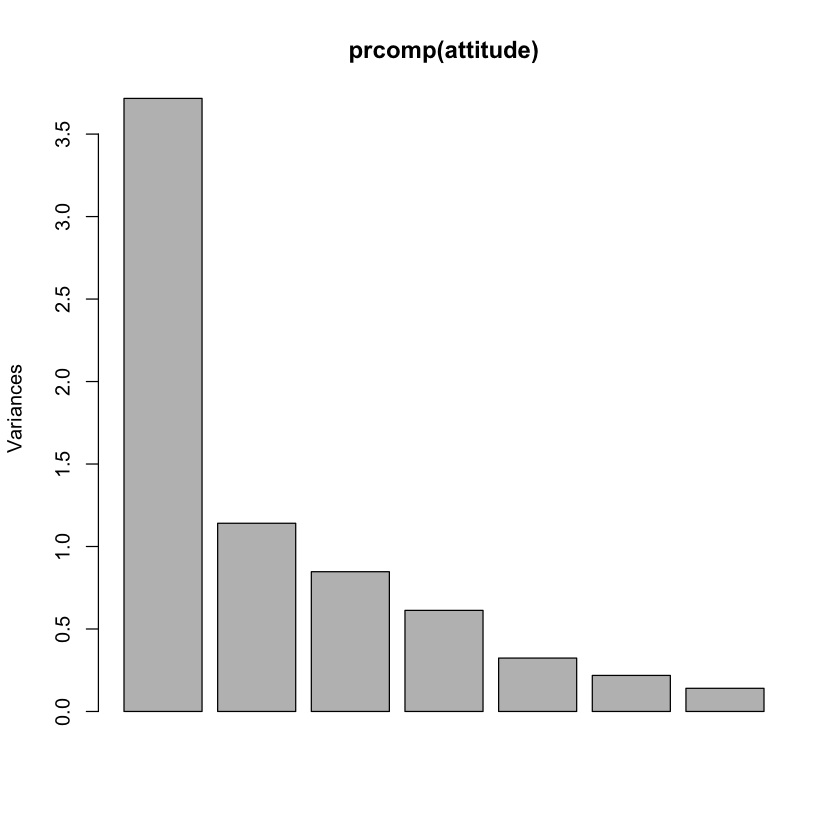

In [44]:
plot(prcomp(attitude))

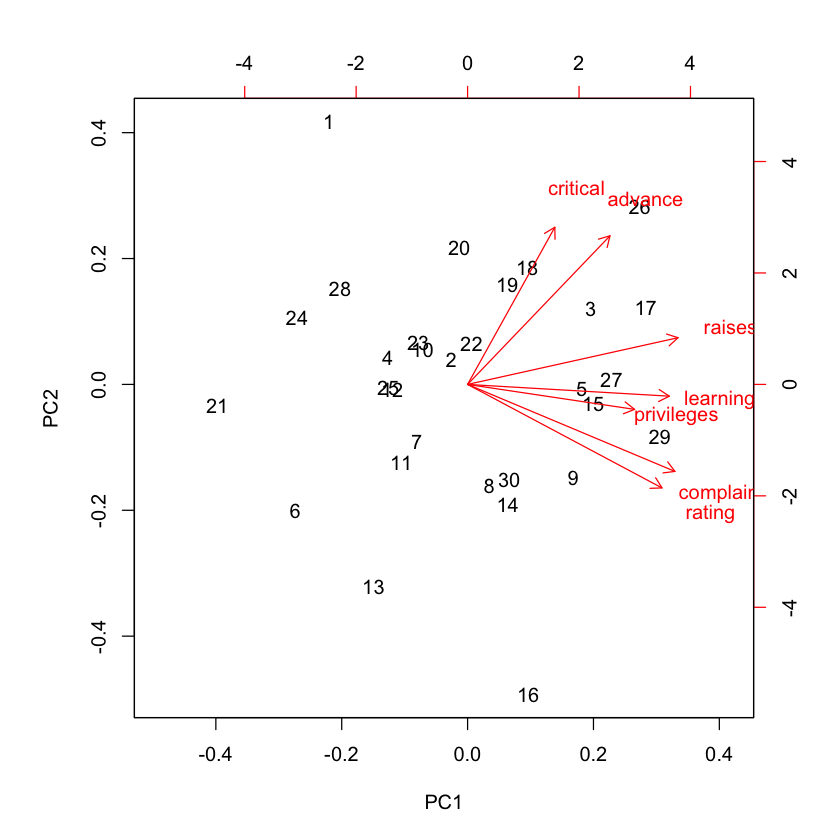

In [45]:
biplot(prcomp(attitude))

### What now? Principal curves and manifolds.

<img src="manifold.png">